In [244]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
forest =  pd.read_csv("C:/Users/Bin/Documents/Datasets/forest cover/covtype.data",header=None)

In [307]:
buffer =  pd.read_csv("C:/Users/Bin/Desktop/tmp",header=None)

Text(0.5,1,'Number of windows in normal buffer')

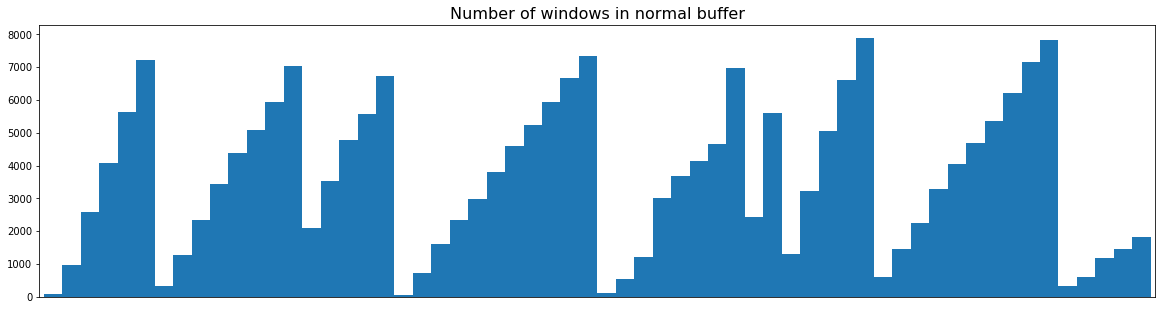

In [301]:
buffer.iloc[:,1].plot(kind="bar",figsize=(20,5),width=1)
plt.xticks([])
plt.title("Number of windows in normal buffer",fontsize=16)

Text(0.5,1,'Number of windows in abnormal buffer')

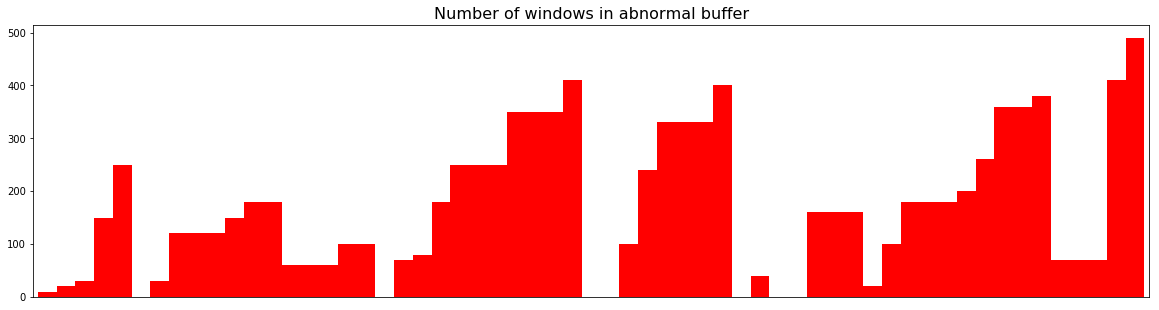

In [308]:
buffer.iloc[:,2].plot(kind="bar",figsize=(20,5),width=1,color="r")
plt.xticks([])
plt.title("Number of windows in abnormal buffer",fontsize=16)

In [66]:
labels = forest.iloc[:,-1]

In [134]:
forest = pd.concat((forest.iloc[:,:6],forest.iloc[:,9],forest.iloc[:,-1]),axis=1)


In [237]:
retrain = []
for x in   [141,658,1423,1996,3071,3856,4074,4511,5516]:
    retrain.append(x*80+100000)
retrain

[111280, 152640, 213840, 259680, 345680, 408480, 425920, 460880, 541280]

In [229]:
data = pd.read_csv("C:/Users/Bin/Desktop/Thesis/dataset/forest/forest_cbyc_classlabel.csv",header=None,)

In [264]:
labels.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: 54, dtype: int64

In [276]:
l1 = pd.Series(np.zeros(classlabel[classlabel==1].shape[0]))
l1[::100] = 1
l2 = pd.Series(np.zeros(classlabel[classlabel==2].shape[0]))
l2[::100] = 1
l3 = pd.Series(np.zeros(classlabel[classlabel==3].shape[0]))
l3[::100] = 1
l5 = pd.Series(np.zeros(classlabel[classlabel==5].shape[0]))
l5[::100] = 1
l6 = pd.Series(np.zeros(classlabel[classlabel==6].shape[0]))
l6[::100] = 1
l7 = pd.Series(np.zeros(classlabel[classlabel==7].shape[0]))
l7[::100] = 1
l4 = pd.Series(np.zeros(classlabel[classlabel==4].shape[0]))
l4[::100] = 1

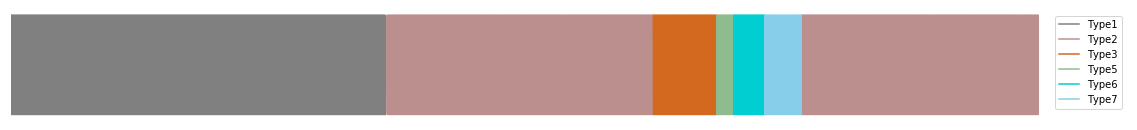

In [302]:
plt.figure(figsize=(20,2))
plt.xlim(0,data.shape[0]+50000)
plt.plot(l1,c="grey",label="Type1")
plt.plot( pd.Series(classlabel[classlabel==2]).index,l2,c="rosybrown",label="Type2")
plt.plot( pd.Series(classlabel[classlabel==3]).index,l3,c="chocolate",label="Type3")
#plt.plot( pd.Series(classlabel[classlabel==4]).index,l4,c="r")
plt.plot( pd.Series(classlabel[classlabel==5]).index,l5,c="darkseagreen",label="Type5")
plt.plot( pd.Series(classlabel[classlabel==6]).index,l6,c="darkturquoise",label="Type6")
plt.plot( pd.Series(classlabel[classlabel==7]).index,l7,c="skyblue",label="Type7")
plt.legend()
plt.yticks([])
plt.xticks([])
plt.axis('off')
plt.show()

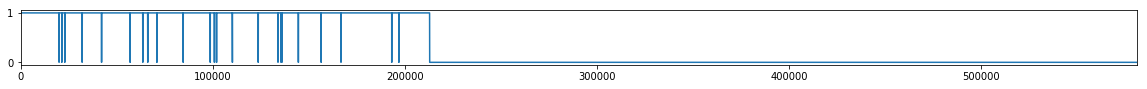

In [284]:
classlabel = data.iloc[:,-1]

c1 = np.zeros(classlabel.shape[0])
c1[classlabel==1] = 1
pd.Series(c1).plot(figsize=(20,1))

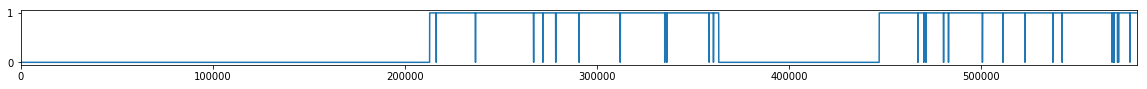

In [231]:
c1 = np.zeros(classlabel.shape[0])
c1[classlabel==2] = 1
pd.Series(c1).plot(figsize=(20,1))

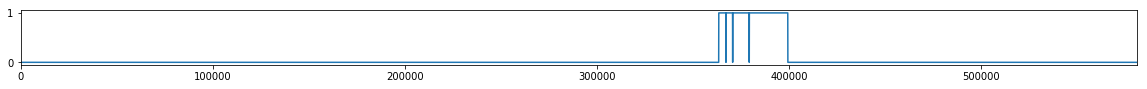

In [232]:
c1 = np.zeros(classlabel.shape[0])
c1[classlabel==3] = 1
pd.Series(c1).plot(figsize=(20,1))

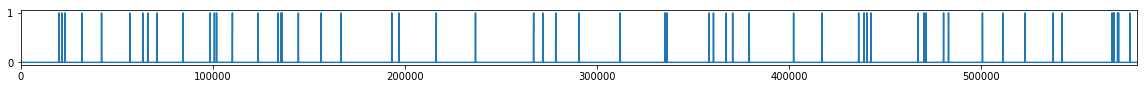

In [233]:
c1 = np.zeros(classlabel.shape[0])
c1[classlabel==4] = 1
pd.Series(c1).plot(figsize=(20,1))

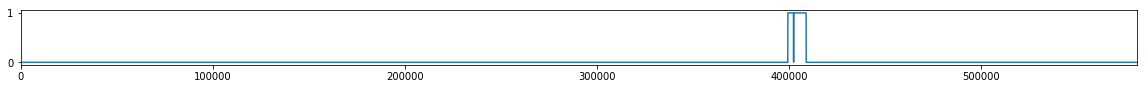

In [234]:
c1 = np.zeros(classlabel.shape[0])
c1[classlabel==5] = 1
pd.Series(c1).plot(figsize=(20,1))

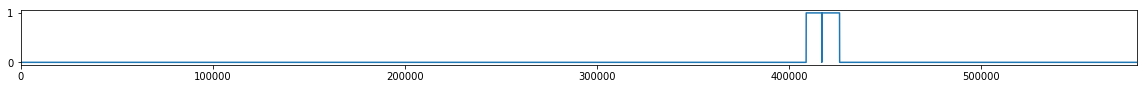

In [235]:
c1 = np.zeros(classlabel.shape[0])
c1[classlabel==6] = 1
pd.Series(c1).plot(figsize=(20,1))

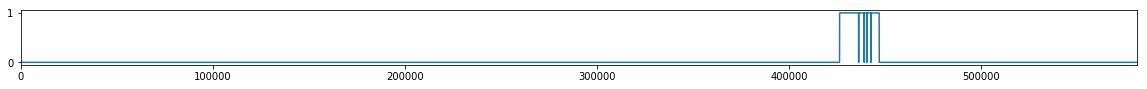

In [236]:
c1 = np.zeros(classlabel.shape[0])
c1[classlabel==7] = 1
pd.Series(c1).plot(figsize=(20,1))

In [126]:
foo = forest
bar = foo.iloc[:,-1]
bar[bar!=4] = "normal"
bar[bar==4] = "anomaly"

In [127]:
foo.to_csv("C:/Users/Bin/Desktop/Thesis/dataset/ht.csv",header=None, index=None)

In [128]:
foo[foo.iloc[:,-1]=="anomaly"].index


Int64Index([  1988,   1997,   2012,   2026,   2039,   2052,   2067,   2080,
              2090,   2109,
            ...
            300850, 300918, 300919, 301737, 302284, 302782, 305736, 306168,
            306713, 307206],
           dtype='int64', length=2747)

# Generation of forest class by class data, with anomaly in each class

In [221]:
data = forest[forest.iloc[:,-1] == 1]
data = pd.concat((data, forest[forest.iloc[:,-1]==2][:150000]),axis = 0)

data = pd.concat((data, forest[forest.iloc[:,-1]==3]),axis = 0)

data = pd.concat((data, forest[forest.iloc[:,-1]==5]),axis = 0)
data = pd.concat((data, forest[forest.iloc[:,-1]==6]),axis = 0)
data = pd.concat((data, forest[forest.iloc[:,-1]==7]),axis = 0)

data = pd.concat((data, forest[forest.iloc[:,-1]==2][150000:]),axis = 0)
data.shape

(578265, 8)

In [222]:
anomalies = forest[forest.iloc[:,-1]==4]

In [223]:
import random
achunks = []
last_i = 0
while last_i < forest[forest.iloc[:,-1]==4].shape[0]-100:
    i = last_i + random.randint(5,100)
    achunks.append(anomalies[last_i:i])
    last_i = i
achunks.append(anomalies[last_i:])

In [224]:
insert_pos = random.sample(range(data.shape[0]),  len(achunks))
for num in range(len(achunks)):
    pos = insert_pos[num]
    insert_a = achunks[num]
    data = pd.concat([data[:pos],insert_a,data[pos:]],axis=0)

In [225]:
data.to_csv("C:/Users/Bin/Desktop/Thesis/dataset/forest/forest_cbyc_classlabel.csv",header=None, index=None)
classes = data.iloc[:,-1]
classes[classes !=4 ] = "normal"
classes[classes ==4 ] ="anomaly"
data.to_csv("C:/Users/Bin/Desktop/Thesis/dataset/forest/forest_cbyc.csv",header=None, index=None)

In [226]:
classlabel.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: 54, dtype: int64